# Protein clustering process

## Setup

Add user's current working directory to search path:

In [1]:
import sys
sys.path = [r"C:\sw\plb"] + sys.path

Also change current working directory:

In [2]:
import os
os.chdir(r"C:\sw\plb")

Imports:

In [3]:
from collections import Counter
from pathlib import Path

import myst_nb

from src.config import get_config
from src.data_split.protein_clustering import read_protein_cluster_labels
from src.data_structure_utils import read_tsv
from src.stats_utils import (
    get_stats_from_counter,
    print_counter_stats_df,
)

Set up document options:

In [4]:
# This import automatically sets seeds
import src.set_seed

# Nice pandas tables
import itables
itables.init_notebook_mode(all_interactive=True)
itables.options.maxColumns = 0  # unlimited columns
itables.options.maxBytes = 32000000
itables.options.classes = ["display", "nowrap"]
itables.options.order = [] # disable auto-sorting

<IPython.core.display.Javascript object>

Get filepaths of data directories:

In [5]:
config = get_config()
dir_data = Path(config["data_directory"])
dir_features = Path(config["features_directory"])

## Overview

The general process I used for clustering the protein sequences is:

- Get a combined list of all unique protein sequences present in the filtered
  BindingDB and BioLiP dataframes
- Cluster the sequences using [mmseqs cluster](https://github.com/soedinglab/MMseqs2)
  with a sequence identity threshold of >10% (otherwise, I used default options)


## Cluster statistics

Read the protein cluster assignments file:

In [6]:
df_protein_clusters = read_protein_cluster_labels(
    proteins_fasta=dir_features / "all_proteins_single.fasta",
    clusters_tsv=dir_features / "all_proteins_single_mmseqs_db_seqid_0.1/clusters.tsv",
)

Print a sample of the clustering outputs:

In [7]:
itables.show(df_protein_clusters.head(30))

Loading... (need help?)


Generate some statistics from the clustering outputs:

Total number of entries: 14167
Total number of unique entries: 3230
Distribution of frequencies of individual entries, linear scale (left):
Distribution of frequencies of individual entries, log scale (right):


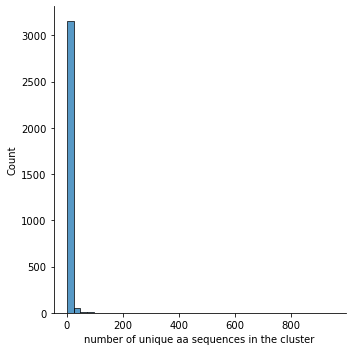

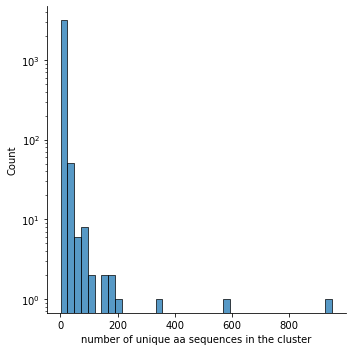

In [8]:
protein_cluster_stats = get_stats_from_counter(
    counts=Counter(df_protein_clusters["cluster"]),
    ntop=30,
    nbins=40,
    name_of_thing_being_counted="cluster_label",
    xaxis_name="number of unique aa sequences in the cluster",
    do_show=True,
)

The most commonly occurring clusters are:

In [9]:
print_counter_stats_df(protein_cluster_stats)

Loading... (need help?)
